In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Ameyaveer
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ameyaveer
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ameyaveer
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ameyaveer
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load and inspect data

In [2]:
train = pd.read_csv("C:/Users/Ameyaveer Singh/OneDrive/Desktop/Kaggle Comp/Natural Language Processing with Disaster Tweets/train.csv")
test = pd.read_csv("C:/Users/Ameyaveer Singh/OneDrive/Desktop/Kaggle Comp/Natural Language Processing with Disaster Tweets/test.csv")

train.info()

pd.set_option('display.max_colwidth', None)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


Text Pre-Processing 

In [3]:
def preprocess_text(text):
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Lowercasing
    text = text.lower()

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    text = ' '.join(words)

    # Punctuation Removal
    text = re.sub('[,\.!?]', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenisation
    words = word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(words)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in text.split()]
    text = ' '.join(words)


    return text

# Preprocess text column
train['preprocessed_text'] = train['text'].apply(preprocess_text)
train[['text', 'preprocessed_text']].head()

,text,preprocessed_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,deed reason earthquak may allah forgiv u
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,resid ask shelter place notifi offic evacu shelter place order expect
3,"13,000 people receive #wildfires evacuation orders in California",13000 peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got sent photo rubi alaska smoke wildfir pour school


EDA

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


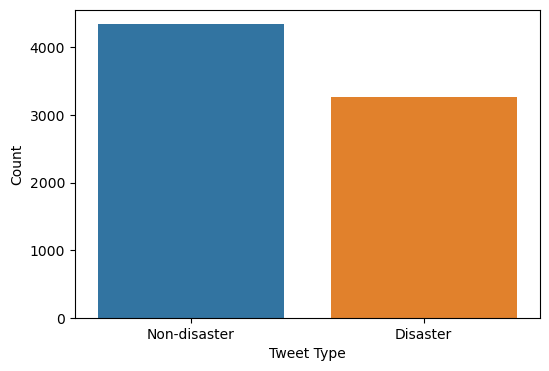

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train)
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-disaster', 'Disaster'])
plt.show()

In [33]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 300.0/300.0 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


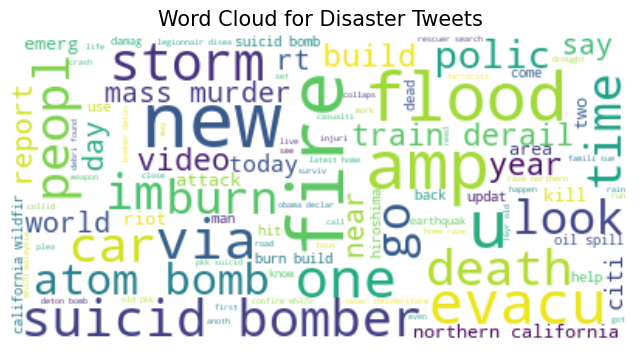

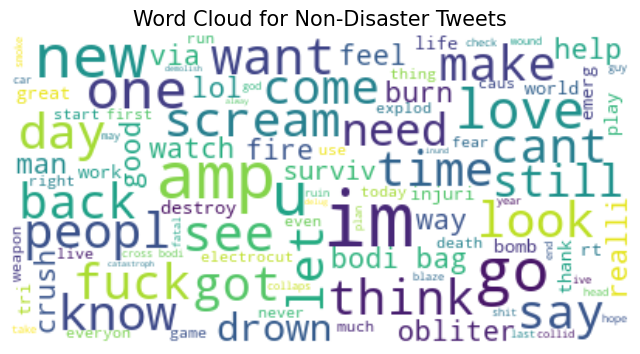

In [36]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

# Generate word clouds for disaster and non-disaster tweets
disaster_tweets = train[train['target'] == 1]['preprocessed_text']
non_disaster_tweets = train[train['target'] == 0]['preprocessed_text']

generate_word_cloud(disaster_tweets, "Word Cloud for Disaster Tweets")
generate_word_cloud(non_disaster_tweets, "Word Cloud for Non-Disaster Tweets")

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


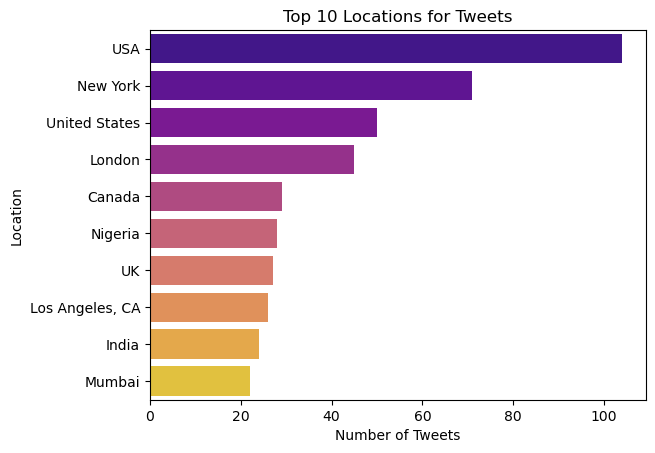

In [38]:
top_locations = train['location'].value_counts().head(10)
sns.barplot( x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top 10 Locations for Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()

Converting text into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF) 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(train['preprocessed_text'])

In [20]:
print(tfidf_matrix)

  (0, 5215)	0.47940279955281656
  (0, 1058)	0.42803462645305107
  (0, 8258)	0.30675657813584817
  (0, 4361)	0.340096452251904
  (0, 10629)	0.36282723096076896
  (0, 3778)	0.49553054370796745
  (1, 2558)	0.3885679992710967
  (1, 11297)	0.49216450286952135
  (1, 11043)	0.49216450286952135
  (1, 7493)	0.3497979859378276
  (1, 8980)	0.3147643609890548
  (1, 5057)	0.22017272923852071
  (1, 5208)	0.3076554071644166
  (2, 4776)	0.23229236198680484
  (2, 9531)	0.22732139542094126
  (2, 4711)	0.18426170539478254
  (2, 9362)	0.22213667461518066
  (2, 9228)	0.33494319057990524
  (2, 10001)	0.4624842152454866
  (2, 11612)	0.5902782133026806
  (2, 1435)	0.24064451965839742
  (2, 10815)	0.2804486035869624
  (3, 2521)	0.30676703295795327
  (3, 14151)	0.3281919299739305
  (3, 10645)	0.4952583266248175
  :	:
  (7610, 6)	0.47789574007189944
  (7610, 6033)	0.42136266201799605
  (7610, 8023)	0.46542541540331034
  (7610, 13852)	0.3652933605995829
  (7611, 9174)	0.298620008310979
  (7611, 10124)	0.298620008

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = tfidf_matrix
y = train['target'] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7872619829284307


In [23]:
# Make predictions on new data
new_text = ["Heard about #earthquake is different cities"]
new_text_preprocessed = [preprocess_text(text) for text in new_text]
new_tfidf_matrix = tfidf_vectorizer.transform(new_text_preprocessed)
prediction = logreg.predict(new_tfidf_matrix)
print(f"Prediction: {prediction}")

Prediction: [1]


In [6]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.82      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = tfidf_matrix
y = train['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = nb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8030203545633617


In [8]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.83      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [13]:
test['preprocessed_text'] = test['text'].apply(preprocess_text)
test[['text', 'preprocessed_text']].head()
X_test = tfidf_vectorizer.transform(test['preprocessed_text'])

In [14]:
# Make predictions on the test set
test_predictions = nb.predict(X_test)

# Prepare the submission dataframe
submission = pd.DataFrame({
    'id': test['id'],
    'target': test_predictions
})
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [15]:
# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
